In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pymupdf

In [3]:
# !python -m pip install pyyaml==5.1
# import sys, os, distutils.core
# # Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# # See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
# !git clone 'https://github.com/facebookresearch/detectron2'
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2'))

# # Properly install detectron2. (Please do not install twice in both ways)
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-wz3mqyb2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-wz3mqyb2
  Resolved https://github.com/facebookresearch/detectron2.git to commit a0e22dbfa791e6235e4f196d5ce25e754d02be31
  Preparing metadata (setup.py) ... done


In [4]:
import detectron2
import torch

# Loading train and test files

In [5]:
import os

train_directory = r"/content/drive/MyDrive/Docsumo - IT MEET/Data Extraction/Train Files"
train_pdf_files = [file for file in os.listdir(train_directory) if file.lower().endswith('.pdf')]
len(train_pdf_files)

160

In [6]:
test_directory = r"/content/drive/MyDrive/Docsumo - IT MEET/Data Extraction/Test Files"
test_pdf_files = [file for file in os.listdir(test_directory) if file.lower().endswith('.pdf')]
len(test_pdf_files)

40

# Converting pdf files to jpg

In [7]:
# import fitz
# def convert_pdf_to_jpg(filename, dir):
#     doc = fitz.open(os.path.join(dir, filename))
#     pix = doc[0].get_pixmap()
#     jpg_file = os.path.splitext(filename)[0] + '.jpg'
#     pix.save(os.path.join(dir, "jpg", jpg_file))
#     print(f"{filename} converted and save as jpg")

# for file_name in train_pdf_files:
#     convert_pdf_to_jpg(file_name, train_directory)

# for file_name in test_pdf_files:
#     convert_pdf_to_jpg(file_name, test_directory)

In [8]:
new_train_directory = os.path.join(train_directory, "jpg")
new_test_directory = os.path.join(test_directory, "jpg")

In [9]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
image1 = cv2.imread(os.path.join(new_train_directory, "1040_file_2.jpg"))
HEIGHT = image1.shape[0]
WIDTH = image1.shape[1]

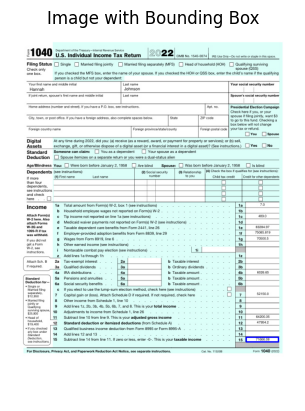

In [11]:
bbox = [111.9,329.1,639.7,361.1]
bbox = [1404.1,1819.8,1596,1848.5]

scaling_factor = 612 / 1700.0
bbox = [int(box * scaling_factor) for box in bbox]
cv2.rectangle(image1, bbox[:2], bbox[2:], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Box')
plt.axis('off')  # Turn off axis labels
plt.show()

## Reading the train csv

In [12]:
train_csv = r"/content/drive/MyDrive/Docsumo - IT MEET/Data Extraction/DE-TRAIN.csv"
train_df = pd.read_csv(train_csv)

def change_file_extension(file_name):
    return file_name.replace('.pdf', '.jpg')

train_df["file_name"] = train_df['file_name'].apply(change_file_extension)

train_df

,file_name,label,value,x0,y0,x2,y2
0,1040_file_1.jpg,Basic Information___First Name,Maureen,111.9,329.1,639.7,361.1
1,1040_file_1.jpg,Basic Information___Last Name,Hoffman,673.3,325.9,1258.6,359.5
2,1040_file_1.jpg,Income___One_F,23287.39,1405.7,1183.9,1594.4,1211.0
3,1040_file_1.jpg,Income___Three_B,8,1404.1,1386.8,1596.0,1412.3
4,1040_file_1.jpg,Income___Four_B,6,1404.1,1420.3,1599.2,1445.9
...,...,...,...,...,...,...,...
2182,1040_file_200.jpg,Income___Six_B,81325.78,1402.5,1487.4,1596.0,1511.4
2183,1040_file_200.jpg,Income___Nine,73661.413,1404.1,1618.4,1592.9,1644.0
2184,1040_file_200.jpg,Income___Ten,41023.34,1402.5,1652.0,1600.8,1679.2
2185,1040_file_200.jpg,Income___Eleven,75223.22,1402.5,1684.0,1599.2,1709.5


In [13]:
labels = train_df["label"].unique()
labels

array(['Basic Information___First Name', 'Basic Information___Last Name',
       'Income___One_F', 'Income___Three_B', 'Income___Four_B',
       'Income___Five_B', 'Income___Six_B', 'Income___Eight',
       'Income___Nine', 'Income___Eleven', 'Income___Twelve',
       'Income___Fifteen', 'Income___One_A', 'Income___One_C',
       'Income___One_E', 'Income___One_G', 'Income___Seven',
       'Income___One_H', 'Income___Ten', 'Income___Thirteen',
       'Income___Two_B', 'Income___Fourteen', 'Income___One_D',
       'Income___One_Z', 'Income___One_B'], dtype=object)

In [14]:
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for idx, label in enumerate(labels)}
print(label2id)
print(id2label)


{'Basic Information___First Name': 0, 'Basic Information___Last Name': 1, 'Income___One_F': 2, 'Income___Three_B': 3, 'Income___Four_B': 4, 'Income___Five_B': 5, 'Income___Six_B': 6, 'Income___Eight': 7, 'Income___Nine': 8, 'Income___Eleven': 9, 'Income___Twelve': 10, 'Income___Fifteen': 11, 'Income___One_A': 12, 'Income___One_C': 13, 'Income___One_E': 14, 'Income___One_G': 15, 'Income___Seven': 16, 'Income___One_H': 17, 'Income___Ten': 18, 'Income___Thirteen': 19, 'Income___Two_B': 20, 'Income___Fourteen': 21, 'Income___One_D': 22, 'Income___One_Z': 23, 'Income___One_B': 24}
{0: 'Basic Information___First Name', 1: 'Basic Information___Last Name', 2: 'Income___One_F', 3: 'Income___Three_B', 4: 'Income___Four_B', 5: 'Income___Five_B', 6: 'Income___Six_B', 7: 'Income___Eight', 8: 'Income___Nine', 9: 'Income___Eleven', 10: 'Income___Twelve', 11: 'Income___Fifteen', 12: 'Income___One_A', 13: 'Income___One_C', 14: 'Income___One_E', 15: 'Income___One_G', 16: 'Income___Seven', 17: 'Income___

## generating dataset

In [15]:
file_names = train_df["file_name"].unique()
len(file_names)

160

In [16]:
import tqdm.notebook as tqdm

labels = []
words = []
bboxes = []

for file_name in file_names:
    temp_df = train_df[train_df["file_name"] == file_name]
    labels_i = []
    words_i = []
    bboxes_i = []

    for index, row in temp_df.iterrows():
        label = row["label"]
        word = row["value"]
        bbox = [row["x0"], row["y0"], row["x2"], row["y2"]]

        labels_i.append(label)
        words_i.append(word)
        bboxes_i.append(bbox)

    labels.append(labels_i)
    words.append(words_i)
    bboxes.append(bboxes_i)

print(len(labels), len(words), len(bboxes))


160 160 160


In [17]:
(words[0])

['Maureen',
 'Hoffman',
 '23287.39',
 '8',
 '6',
 '366',
 '2268.27',
 '5884',
 '4495',
 '58037.69',
 '64460',
 '17']

In [18]:
annotations = [words, labels, bboxes]

In [19]:
def normalize_bbox(bbox, width = 224, height = 224):
     return [
         int((bbox[0] / width)),
         int((bbox[1] / height)),
         int((bbox[2] / width)),
         int((bbox[3] / height)),
     ]


def resize_image_and_bbox(image, bboxes, target_size = (224, 224)):
  """
  bbox: (x0,y0,x1,y1)
  target_size: (height,width)
  """
  resized_image = cv2.resize(image, target_size)
  scale_y = target_size[0] / image.shape[0]
  scale_x = target_size[1] / image.shape[1]

  resized_bboxes = []
  for bbox in bboxes:
    x, y, x1, y1 = bbox
    x *= scale_x
    x1 *= scale_x
    y *= scale_y
    y1 *= scale_y
    resized_bboxes.append(normalize_bbox([x, y, x1, y1]))

  return resized_image, resized_bboxes


In [20]:
from os import listdir
from torch.utils.data import Dataset
import torch

class FormsDataset(Dataset):
    """Forms dataset."""

    def __init__(self, annotations, image_dir, file_names, processor=None, max_length=512):
        """
        Args:
            annotations (List[List]): List of lists containing the word-level annotations (words, labels, boxes).
            image_dir (string): Directory with all the document images.
            processor (LayoutLMv2Processor): Processor to prepare the text + image.
        """
        self.words, self.labels, self.boxes = annotations
        self.image_dir = image_dir
        self.image_file_names = file_names
        self.processor = processor

    def __len__(self):
        return len(self.image_file_names)

    def __getitem__(self, idx):
        # first, take an image
        item = self.image_file_names[idx]
        image = cv2.imread(os.path.join(self.image_dir, item))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # get word-level annotations
        words = self.words[idx]
        boxes = self.boxes[idx]
        word_labels = self.labels[idx]

        image, boxes = resize_image_and_bbox(image, boxes)
        assert len(words) == len(boxes) == len(word_labels)

        word_labels = [label2id[label] for label in word_labels]
        # use processor to prepare everything
        encoded_inputs = self.processor(image, words, boxes=boxes, word_labels=word_labels,
                                        padding="max_length", truncation=True,
                                        return_tensors="pt")

        # remove batch dimension
        for k,v in encoded_inputs.items():
          encoded_inputs[k] = v.squeeze()

        assert encoded_inputs.input_ids.shape == torch.Size([512])
        assert encoded_inputs.attention_mask.shape == torch.Size([512])
        assert encoded_inputs.token_type_ids.shape == torch.Size([512])
        assert encoded_inputs.bbox.shape == torch.Size([512, 4])
        assert encoded_inputs.image.shape == torch.Size([3, 224, 224])
        assert encoded_inputs.labels.shape == torch.Size([512])

        return encoded_inputs

In [21]:
from transformers import LayoutLMv2Processor
from transformers import AutoProcessor

processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")
# processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

dataset = FormsDataset(annotations, new_train_directory, file_names, processor)

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

## Testing dataset

In [22]:
encoding = dataset[0]
encoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'bbox', 'labels', 'image'])

## Splitting into train and val sets


In [23]:
from torch.utils.data import random_split, DataLoader

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [24]:
from transformers import LayoutLMv2ForTokenClassification
import torch
from tqdm.notebook import tqdm

model = LayoutLMv2ForTokenClassification.from_pretrained('microsoft/layoutlmv2-base-uncased',num_labels=len(labels))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 2

#put the model in training mode
model.train()
for epoch in range(num_train_epochs):
   print("Epoch:", epoch)
   for batch in tqdm(train_dataloader):
        # get the inputs;
        input_ids = batch['input_ids'].to(device)
        bbox = batch['bbox'].to(device)
        bbox = bbox.int()
        image = batch['image'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['labels'].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(input_ids=input_ids,
                        bbox=bbox,
                        image=image,
                        attention_mask=attention_mask,
                        token_type_ids=token_type_ids,
                        labels=labels)
        loss = outputs.loss

        # print loss every 100 steps
        if global_step % 100 == 0:
          print(f"Loss after {global_step} steps: {loss.item()}")

        loss.backward()
        optimizer.step()
        global_step += 1

model.save_pretrained(r"/content/drive/MyDrive/Docsumo - IT MEET")

pytorch_model.bin:   0%|          | 0.00/802M [00:00<?, ?B/s]

Some weights of LayoutLMv2ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 0


  0%|          | 0/64 [00:00<?, ?it/s]

Loss after 0 steps: 5.061065673828125


KeyboardInterrupt: ignored

ImportError: ignored